In [ ]:
import pandas as pd
import pandas_datareader as pdr

In [ ]:
key='5afddcffb85d2f8ea65323fdf0cd362d07b7b600'

In [ ]:
df=pdr.get_data_tiingo('AAPL',api_key=key)

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [ ]:
df.to_csv('Aapl.csv')

In [ ]:
df2=pd.read_csv('Aapl.csv')

In [ ]:
df2.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-02-21 00:00:00+00:00,136.70,136.750,135.98,136.23,24507156,32.261723,32.273523,32.091800,32.150801,98028624,0.0,1.0
1,AAPL,2017-02-22 00:00:00+00:00,137.11,137.120,136.11,136.43,20836932,32.358485,32.360845,32.122481,32.198002,83347728,0.0,1.0
2,AAPL,2017-02-23 00:00:00+00:00,136.53,137.480,136.30,137.38,20788186,32.221602,32.445806,32.167321,32.422206,83152744,0.0,1.0
3,AAPL,2017-02-24 00:00:00+00:00,136.66,136.660,135.28,135.91,21776585,32.252283,32.252283,31.926598,32.075280,87106340,0.0,1.0
4,AAPL,2017-02-27 00:00:00+00:00,136.93,137.435,136.28,137.14,20257426,32.316004,32.435186,32.162601,32.365565,81029704,0.0,1.0


In [ ]:
df2.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2022-02-10 00:00:00+00:00,172.12,175.48,171.55,174.14,90865899,172.12,175.48,171.55,174.14,90865899,0.0,1.0
1254,AAPL,2022-02-11 00:00:00+00:00,168.64,173.08,168.04,172.33,98670687,168.64,173.08,168.04,172.33,98670687,0.0,1.0
1255,AAPL,2022-02-14 00:00:00+00:00,168.88,169.58,166.56,167.37,86185530,168.88,169.58,166.56,167.37,86185530,0.0,1.0
1256,AAPL,2022-02-15 00:00:00+00:00,172.79,172.95,170.25,170.97,64286320,172.79,172.95,170.25,170.97,64286320,0.0,1.0
1257,AAPL,2022-02-16 00:00:00+00:00,172.55,173.34,170.05,171.85,61177398,172.55,173.34,170.05,171.85,61177398,0.0,1.0


In [ ]:
df1=df2.reset_index()['close']

In [ ]:
df1.shape

(1258,)

In [ ]:
import matplotlib.pyplot as plt

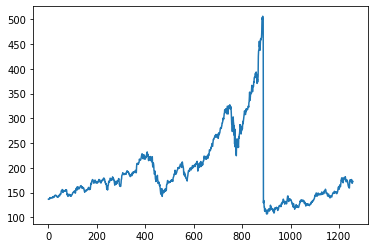

In [ ]:
plt.plot(df1)

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler 
sc=MinMaxScaler()
df1=sc.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.07479023],
       [0.07581716],
       [0.07436443],
       ...,
       [0.15539136],
       [0.16518472],
       [0.16458359]])

In [ ]:
training_data=int(len(df1)*0.7)
testing_data=int(len(df1)-training_data)


In [ ]:
train_data,test_data=df1[0:training_data,:],df1[training_data:len(df1),:]

In [ ]:
def create_dataset(dataset,time_step=1):
  data_x=[]
  data_y=[]

  for i in range(len(dataset)-time_step-1):
   a=dataset[i:(i+time_step),0]
   data_x.append(a)
   data_y.append(dataset[i+time_step,0])

   return np.array(data_x),np.array(data_y)

In [ ]:
time_step=100
X_train,Y_train=create_dataset(train_data,time_step)
X_test,Y_test=create_dataset(test_data,time_step)


In [ ]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
X_train

array([[[0.07479023],
        [0.07581716],
        [0.07436443],
        [0.07469004],
        [0.07536631],
        [0.07551659],
        [0.08252974],
        [0.08045085],
        [0.0825047 ],
        [0.08140263],
        [0.08185348],
        [0.08055103],
        [0.07974953],
        [0.08090169],
        [0.08105197],
        [0.08052599],
        [0.08420789],
        [0.08478397],
        [0.08303068],
        [0.08671259],
        [0.08265498],
        [0.0866124 ],
        [0.08536005],
        [0.08465874],
        [0.08525986],
        [0.09257358],
        [0.09337508],
        [0.09289919],
        [0.09222292],
        [0.09232311],
        [0.09500313],
        [0.09312461],
        [0.09222292],
        [0.09142142],
        [0.09099562],
        [0.08713838],
        [0.08756418],
        [0.08568566],
        [0.08763932],
        [0.08606137],
        [0.08475892],
        [0.08916719],
        [0.08874139],
        [0.09217282],
        [0.094402  ],
        [0

In [ ]:
print(X_train.shape), print(Y_train.shape)


(1, 100, 1)
(1,)


(None, None)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
1/1 [==============================] - 22s 22s/step - loss: 0.0100 - val_loss: 4.3645e-04
Epoch 2/100
1/1 [==============================] - 0s 288ms/step - loss: 0.0040 - val_loss: 1.6509e-04
Epoch 3/100
1/1 [==============================] - 0s 249ms/step - loss: 5.3902e-04 - val_loss: 0.0026
Epoch 4/100
1/1 [==============================] - 0s 251ms/step - loss: 5.0399e-04 - val_loss: 0.0050
Epoch 5/100
1/1 [==============================] - 0s 226ms/step - loss: 0.0021 - val_loss: 0.0044
Epoch 6/100
1/1 [==============================] - 0s 212ms/step - loss: 0.0016 - val_loss: 0.0028
Epoch 7/100
1/1 [==============================] - 0s 322ms/step - loss: 5.5135e-04 - val_loss: 0.0015
Epoch 8/100
1/1 [==============================] - 0s 356ms/step - loss: 2.9960e-05 - val_loss: 6.6978e-04
Epoch 9/100
1/1 [==============================] - 0s 257ms/step - loss: 8.7444e-05 - val_loss: 3.0222e-04
Epoch 10/100
1/1 [==============================] - 0s 287ms/step - loss: 

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
test_predict

array([[0.09559134]], dtype=float32)

In [ ]:
##Transformback to original form
train_predict=sc.inverse_transform(train_predict)
test_predict=sc.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

148.87878362742825

In [ ]:
math.sqrt(mean_squared_error(Y_test,test_predict))

144.94983390526244

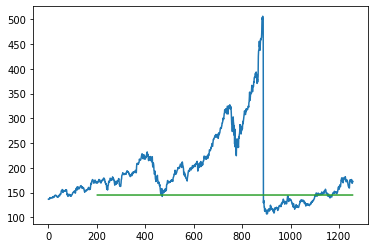

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(sc.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

378

In [ ]:
x_input=test_data[278:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
       # print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


[0.12136387]
1 day output [[0.12137502]]
2 day output [[0.12124251]]
3 day output [[0.1209653]]
4 day output [[0.12056126]]
5 day output [[0.12005652]]
6 day output [[0.1194789]]
7 day output [[0.11885443]]
8 day output [[0.11820551]]
9 day output [[0.11755059]]
10 day output [[0.11690398]]
11 day output [[0.11627623]]
12 day output [[0.11567496]]
13 day output [[0.11510517]]
14 day output [[0.11456968]]
15 day output [[0.11406996]]
16 day output [[0.1136061]]
17 day output [[0.11317751]]
18 day output [[0.1127829]]
19 day output [[0.11242057]]
20 day output [[0.11208867]]
21 day output [[0.11178513]]
22 day output [[0.11150797]]
23 day output [[0.11125508]]
24 day output [[0.11102453]]
25 day output [[0.11081446]]
26 day output [[0.11062305]]
27 day output [[0.11044875]]
28 day output [[0.11029001]]
29 day output [[0.11014539]]
[[0.12136387079954147], [0.12137501686811447], [0.12124250829219818], [0.12096530199050903], [0.12056126445531845], [0.12005652487277985], [0.11947890371084213

In [ ]:
list=[0.09960443526506424, 0.0996873751282692, 0.09959787875413895, 0.09931976348161697, 0.09886905550956726, 0.09827903658151627, 0.09758943319320679, 0.09683962166309357, 0.09606470167636871, 0.09529346972703934,0.09454802423715591, 0.09384388476610184, 0.09319106489419937, 0.09259478747844696, 0.09205682575702667, 0.09157617390155792, 0.09115013480186462, 0.09077485650777817, 0.09044583886861801, 0.09015848487615585,0.08990809321403503, 0.08969026803970337, 0.08950100094079971, 0.0893365666270256, 0.08919375389814377, 0.08906961232423782, 0.08896169066429138, 0.08886777609586716, 0.08878593891859055, 0.08871462196111679]

In [ ]:
df_s=pd.Series(list)

In [ ]:
df=pd.DataFrame(df_s)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5548d29b90>]],
      dtype=object)

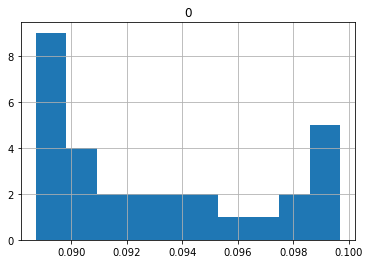

In [ ]:
df.hist()

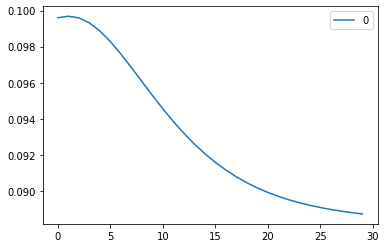

In [ ]:
df.plot()